In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [2]:
path = '/home/jcejudo/projects/duplicate_detection/results/2059516_EU_FD_Collections_Trust/similarity.csv'
data_path = '/home/jcejudo/projects/duplicate_detection/data/2059516_EU_FD_Collections_Trust.csv'
saving_path = '/home/jcejudo/projects/duplicate_detection/results/2059516_EU_FD_Collections_Trust/duplicates.csv'

In [7]:
path = '/home/jcejudo/projects/duplicate_detection/results/rotterdam_museum/similarity.csv'
data_path = '/home/jcejudo/projects/duplicate_detection/data/rotterdam_museum.csv'
saving_path = '/home/jcejudo/projects/duplicate_detection/results/rotterdam_museum/duplicates.csv'

In [8]:
data_df = pd.read_csv(data_path)
data_df = data_df[['europeana_id','uri','image_url']]

df = pd.read_csv(path)
df = df.sort_values(by=['distance'],ascending=False)

print(df.shape[0])
df = df.iloc[::2]

print(df.shape[0])


723
362


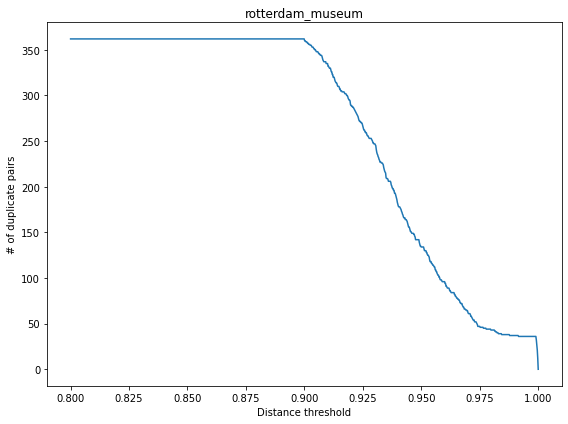

In [10]:
threshold_list = np.linspace(0.8, 1.0, num=1000)
n_pairs_list = []
for threshold in threshold_list:
    _df = df.loc[df['distance'] >= threshold]
    n_pairs = _df.shape[0]
    n_pairs_list.append(n_pairs)
    
dataset_name = Path(saving_path).parent.name
    
fix,ax = plt.subplots(figsize = (8,6))
ax.plot(threshold_list,n_pairs_list)
ax.set_ylabel('# of duplicate pairs')
ax.set_xlabel('Distance threshold')
ax.set_title(dataset_name)
plt.tight_layout()
plt.show()

In [11]:
threshold = 0.9

_df = df.copy()
_df = _df.loc[_df['distance'] >= threshold]

print(_df.shape[0])

_df['from'] = _df['from'].apply(lambda x: x.split('/')[-1].replace('11ph11','/').replace('.jpg',''))
_df['to'] = _df['to'].apply(lambda x: x.split('/')[-1].replace('11ph11','/').replace('.jpg',''))

_df = _df.merge(data_df,left_on='from',right_on='europeana_id')
_df = _df.rename(columns={'from':'id1','image_url':'url1','uri':'uri1'})
_df.pop('europeana_id')
_df = _df.merge(data_df,left_on='to',right_on='europeana_id')
_df = _df.rename(columns={'to':'id2','image_url':'url2','uri':'uri2'})
_df.pop('europeana_id')

#_df.pop('distance')

_df.to_csv(saving_path,index = False)

_df.head()

362


,id1,id2,distance,uri1,url1,uri2,url2
0,/2021609/resource_document_museum_rotterdam_ht...,/700/europeana_fashion_19800_3,0.999990,http://data.europeana.eu/item/2021609/resource...,http://museumrotterdam.blob.core.windows.net/l...,http://data.europeana.eu/item/700/europeana_fa...,https://img.museumrotterdam.nl/700/19800-3_1.jpg
1,/700/europeana_fashion_14015_75,/2021609/resource_document_museum_rotterdam_ht...,0.999965,http://data.europeana.eu/item/700/europeana_fa...,https://img.museumrotterdam.nl/700/14015-75_1.jpg,http://data.europeana.eu/item/2021609/resource...,http://museumrotterdam.blob.core.windows.net/l...
2,/700/europeana_fashion_20666,/2021609/resource_document_museum_rotterdam_ht...,0.999943,http://data.europeana.eu/item/700/europeana_fa...,https://img.museumrotterdam.nl/700/20666_1.jpg,http://data.europeana.eu/item/2021609/resource...,http://museumrotterdam.blob.core.windows.net/l...
3,/700/europeana_fashion_84874_6,/2021609/resource_document_museum_rotterdam_ht...,0.999928,http://data.europeana.eu/item/700/europeana_fa...,https://img.museumrotterdam.nl/700/84874-6_1.jpg,http://data.europeana.eu/item/2021609/resource...,http://museumrotterdam.blob.core.windows.net/l...
4,/700/europeana_fashion_23121_4_A_B,/2021609/resource_document_museum_rotterdam_ht...,0.999915,http://data.europeana.eu/item/700/europeana_fa...,https://img.museumrotterdam.nl/700/23121-4.A-B...,http://data.europeana.eu/item/2021609/resource...,http://museumrotterdam.blob.core.windows.net/l...
